# Boston Data Set Analysis

The Boston housing data set represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts in 506 entries. It was collected in 1978 and presents the Median home values of Boston with associated home and neighborhood attributes.

In [1]:
#Import basic packages
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import keras as kr
import seaborn as sns 

%matplotlib inline

Using TensorFlow backend.


In [2]:
#Import Boston data set
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
#Show the description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#Number of rows and columns in the dataset
print(boston.data.shape)

(506, 13)


In [5]:
#Column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
#Converting the dataset to pandas
bostondf = pd.DataFrame(boston.data)
#showing the first column as column names
bostondf.columns = boston.feature_names

#printing the data set
bostondf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [7]:
#Printing the column target (Price)
target = pd.DataFrame(boston.target)
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [8]:
bostondf.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [9]:
#Adding the target column (Price) to be shown in the dataset


bostondf['MEDV'] = boston.target

#printing the first rows of the dataset
print(bostondf.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [10]:
#summary of the boston data set
print(bostondf.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### Descriptive statistics
Descriptive statistics uses tools like mean and standard deviation on a sample to summarize data.

<function matplotlib.pyplot.show(*args, **kw)>

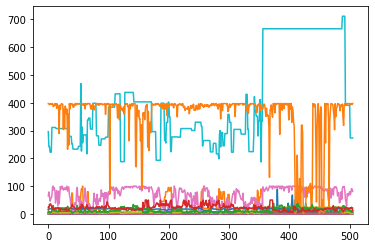

In [11]:
plt.plot(bostondf)
plt.show

In [12]:
price= boston.target
price.mean()

22.532806324110677

In [13]:
# Using pyplot to plot the prices
boston['chas'] = boston.indus

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['chas'], bins=30)
plt.show()

AttributeError: indus

In [ ]:
#code adapted from towardsdatascience.com
#show linear correlations between variables
plt.figure(figsize = (18,18))
correlation_matrix = bostondf.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

### Correlations
The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

The Boston data set heatmap presents strong possitive correlation between the index of accessibility to radial highways (RAD) and the full-value property-tax rate per $10,000 (TAX). Furthermore, there is a possitive relationship between nitric oxides concentration (NOX) and proportion of non-retail business acres per town (INDUS).
Exists as well a positive correltion between Median value of owner-occupied homes in $1000's and average number of rooms per dwelling (RM).

On the other hand, there is strong negative correlations between weighted distances to five Boston employment centres (DIS) and nitric oxides concentration (parts per 10 million) (NOX). Also strong negative correlation between weighted distances to five Boston employment centres (DIS) and proportion of owner-occupied units built prior to 1940 (AGE). 
Moreover there is negative correlation between Median value of owner-occupied homes in $1000's (MEDV) and % lower status of the population (LSTAT).

Negative correlation as well between proportion of non-retail business acres per town (INDUS) and weighted distances to five Boston employment centres (DIS)

 :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

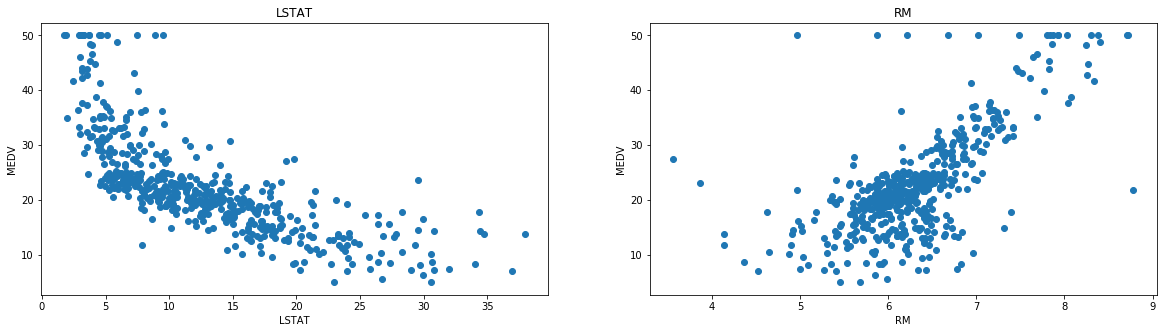

In [26]:
#code adapted from towardsdatascience.com
#ploting LSTAT and MEDV high negative correlation and ploting RM and MEDV strong positive correlation
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bostondf['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostondf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

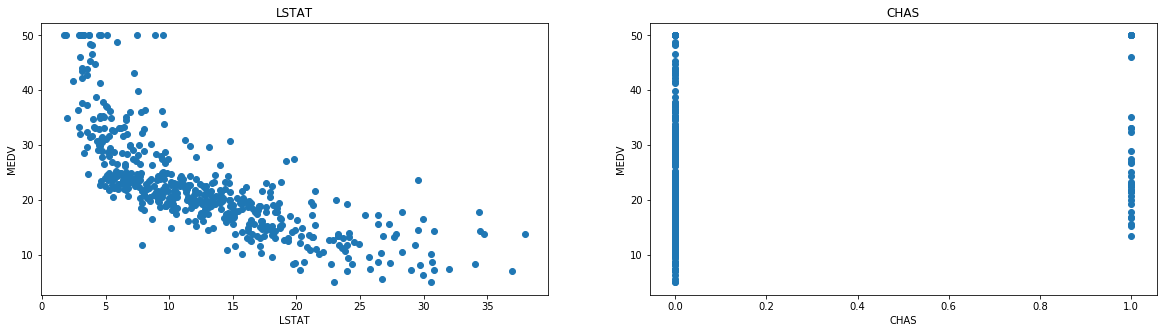

In [27]:
#code adapted from towardsdatascience.com
#ploting LSTAT and MEDV high negative correlation and ploting CHAS and MEDV no strong correlation
plt.figure(figsize=(20, 5))

features = ['LSTAT','CHAS']
target = bostondf['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostondf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Inferential statistics

Inferential statistics allows you to make predictions (“inferences”) from the data, while descriptive statistics describes data (for example, a chart or graph). With inferential statistics, you take data from samples and make generalizations about a population.

There are two main areas of inferential statistics:

Estimating parameters. This means taking a statistic from your sample data (for example the sample mean) and using it to say something about a population parameter (i.e. the population mean).
Hypothesis tests. This is where you can use sample data to answer research questions. 

Example of descriptive statistics:

Sample mean
Sample standard deviation
Making a bar chart or boxplot
Describing the shape of the sample probability distribution
dependent variable.
A bar graph is one way to summarize data in descriptive statistics. Source: NIH.GOV.




With inferential statistics a sample data from a small number of people is taken and and try to determine if the data can predict whether the drug will work for everyone (i.e. the population). There are various ways you can do this, from calculating a z-score (z-scores are a way to show where your data would lie in a normal distribution to post-hoc (advanced) testing.
hypothesis testing example
A hypothesis test can show where your data is placed on a distribution like this one.

Inferential statistics use statistical models to help you compare your sample data to other samples or to previous research. Most research uses statistical models called the Generalized Linear model and include Student’s t-tests, ANOVA (Analysis of Variance), regression analysis and various other models that result in straight-line (“linear”) probabilities and results.

Regression

In [ ]:
River = bostondf['CHAS']
np.polyfit(River, price,1)


In [ ]:
#identifying the correlation between the values and MEDV (price)
correlation_matrix = bostondf.corr().round(2)


price_correlation = correlation_matrix.iloc[:,13:14]

price_correlation

The correlation between MEDV (price of the house) and CHAS (if the house tract bounds river) is the lower correlation attending to the price variable. This shows that there is not a significant difference in median house prices between houses that are along the Charles river and those that aren’t. That variable has a very low correlation with price.

Analysis on regression methods and suitability to find the relationship between the median house price and whether the house borders the river.


T-tests
we could t-test that with the following null hypothesis if the houses close to the river. A starting point id showing if the data follows a normal distrbution with the following hypothesis:

H0: The price data are sampled from a normal distribution

H1: The price data are not sampled from a normal distribution.

And then test the same hypothesis for the river variable.

H0: The data are sampled from a normal distribution

H1: The data are not sampled from a normal distribution.

In [ ]:
# Using pyplot to plot the prices
boston['MEDV'] = boston.target

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

In [ ]:
#Getting the info of the houses that face the river
RiverYES = bostondf[bostondf['CHAS']==1]['MEDV']


# Using pyplot to plot the distribution of the houses facing the river

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(RiverYES, color="y", bins=30)
plt.show()

In [ ]:
#Getting the info of the houses that face the river
RiverNO = bostondf[bostondf['CHAS']==0]['MEDV']


# Using pyplot to plot the distribution of the houses facing the river

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(RiverNO, color="g", bins=30)
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bostondf.iloc[:,3:4], bins=30)
plt.show()

In [ ]:
ss.ttest_ind(price, River)

The plots above show that the MEDV (Price) variable follows a normal distribution, while the second plot shows that the CHAS (houses in the river border) doesn't follow a normal distribution.

To be able to confirm or refect the nul hipothesis, a Saphiro test is going to be used to tests the null hypothesis that the data was drawn from a normal distribution.

In [ ]:
ss.shapiro(price)

In [ ]:
ss.shapiro(River)

One-way ANOVA compares levels (i.e. groups) of a single factor based on single continuous response variable. In this case price would be the continuous variable and CHAS (1 or 0) the factor (categorical).

To continue with the Price - CHAS analysis we are going to divide the data into CHAS 1 (houses in the river border) and CHAS 0 (houses not in the river border)

In [ ]:
#Splitting the dataset between houses that face the river and those that don't

#Getting the info of the houses that face the river
RiverYES = bostondf[bostondf['CHAS']==1]
#Getting the info of the houses that doesn't face the river
RiverNO = bostondf[bostondf['CHAS']==0]

a = bostondf[bostondf['CHAS']==1][['CHAS', 'MEDV', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
b = bostondf[bostondf ['CHAS']==1]['MEDV']
h = bostondf[bostondf ['CHAS']==1]['CHAS']
f = bostondf[bostondf['CHAS']==1][['CHAS', 'MEDV']]

c = bostondf[bostondf['CHAS']==0][['CHAS', 'MEDV', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
d = bostondf[bostondf ['CHAS']==0]['MEDV']
i = bostondf[bostondf ['CHAS']==0]['CHAS']
g = bostondf[bostondf['CHAS']==0][['CHAS', 'MEDV']]

#scatter plot with values divided: Houses in the River in blue , houses not in the river in orange
plt.figure(figsize = (10,10))
plt.scatter(h,b)
plt.scatter(i,d)






In [ ]:
RiverYES = bostondf[bostondf['CHAS']==0]['MEDV']
plt.plot(RiverYES)

In [ ]:
#houses facing the river mean
b.mean()

In [ ]:
#houses not facing the river mean
d.mean()

In [ ]:
#representing river and no river values in the boxplot
sns.boxplot(x='CHAS', y='MEDV', data=bostondf)


### Predict

For the purpose of this first prediction, there is going to be a prediction on the LSTAT % lower status of the population and MEDV Price of the house variables as they are the variables that show a higher correlation, in this case a negative correlation.

Epoch 1/30
506/506 [==============================] - 1s 1ms/step - loss: 101.9329
Epoch 2/30
506/506 [==============================] - 0s 294us/step - loss: 87.3698
Epoch 3/30
506/506 [==============================] - 0s 331us/step - loss: 85.5357
Epoch 4/30
506/506 [==============================] - 0s 294us/step - loss: 88.1207
Epoch 5/30
506/506 [==============================] - 0s 302us/step - loss: 86.5946
Epoch 6/30
506/506 [==============================] - 0s 296us/step - loss: 86.8235
Epoch 7/30
506/506 [==============================] - 0s 297us/step - loss: 86.6430
Epoch 8/30
506/506 [==============================] - 0s 287us/step - loss: 86.6852
Epoch 9/30
506/506 [==============================] - 0s 305us/step - loss: 87.1364
Epoch 10/30
506/506 [==============================] - 0s 300us/step - loss: 87.0690
Epoch 11/30
506/506 [==============================] - 0s 301us/step - loss: 87.6344
Epoch 12/30
506/506 [==============================] - 0s 301us/step - loss

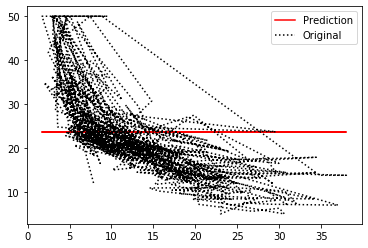

In [32]:
x = bostondf['LSTAT'] 
y = bostondf['MEDV']

#y = y_l
#y = y_p
#y = y_s

# Create a new neural network.
#m = kr.models.Sequential()

# Add neurons.
#m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

# Add neurons
m.add(kr.layers.Dense(20, input_dim=1, activation="relu"))
m.add(kr.layers.Dense(20, activation="linear"))
m.add(kr.layers.Dense(20, activation="tanh"))
m.add(kr.layers.Dense(1, activation='linear'))

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="sgd")

# Train the model.
m.fit(x, y, epochs=30, batch_size=10)

# Run each x value through the neural network.
p = m.predict(x)

# Plot the values.
plt.plot(x, p, 'r-', label='Prediction')
plt.plot(x, y, 'k:', label='Original')
plt.legend()

For the purpose of this second prediction, we are going to try with a linear prediction to ses if we can get a better output. There is going to be a prediction on the RM Rooms in dweling and MEDV Price of the house variables as they are the variables that show a high correltation, in this case a positive correlation that resembles a linear relationship.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
506/506 [==============================] - 0s 379us/step - loss: 355.6947
Epoch 2/15
506/506 [==============================] - 0s 150us/step - loss: 343.2033
Epoch 3/15
506/506 [==============================] - 0s 115us/step - loss: 331.1375
Epoch 4/15
506/506 [==============================] - 0s 120us/step - loss: 319.6439
Epoch 5/15
506/506 [==============================] - 0s 104us/step - loss: 308.3960
Epoch 6/15
506/506 [==============================] - 0s 129us/step - loss: 297.5758
Epoch 7/15
506/506 [==============================] - 0s 185us/step - loss: 287.1404
Epoch 8/15
506/506 [==============================] - 0s 175us/step - loss: 277.0330
Epoch 9/15
506/506 [==============================] - 0s 198us/step - loss: 267.2446
Epoch 10/15
506/506 [==============================] - 0s 182us/step - loss: 257.7645
Epoch 11/15
506/506 [========

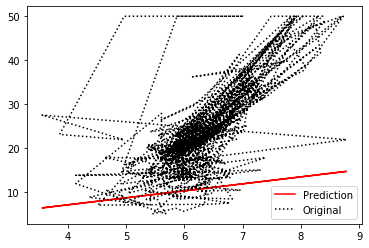

In [24]:
x = bostondf['RM'] 
y = bostondf['MEDV']

#y = y_l
#y = y_p
#y = y_s

# Create a new neural network.
m = kr.models.Sequential()

# Add neurons.
m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

# Add neurons
#m.add(kr.layers.Dense(10, input_dim=1, activation="tanh"))
#m.add(kr.layers.Dense(10, activation="linear"))
#m.add(kr.layers.Dense(1, activation='linear'))

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

# Train the model.
m.fit(x, y, epochs=15, batch_size=10)

# Run each x value through the neural network.
p = m.predict(x)

# Plot the values.
plt.plot(x, p, 'r-', label='Prediction')
plt.plot(x, y, 'k:', label='Original')
plt.legend()